#  Maps Visualization Activity

Aguaviva, Christopher Einstein P.*Mapúa University* | *DS162*

When we map financial data, we get a clear picture of where money flows in Laguna. This helps us spot areas with lots of economic activity and areas that might need more support. By visualizing this information, we can easily understand which parts of Laguna are thriving financially and which ones could use some help.

This isn't just about pretty maps it's about making smart decisions. When policymakers, researchers, and businesses can see where wealth is concentrated and where it's lacking, they can come up with better plans to address economic challenges.

In simple terms, mapping out Laguna's finances helps us figure out how to make the region more prosperous for everyone."


In [171]:
# !pip install geopandas

"This notebook aims to visualize the financial data of each municipality within the province of Laguna. Through these visualizations, we'll gain insights into the economic landscape of the region, exploring factors such as income distribution, business activity, and economic disparities among municipalities. By examining these financial details, we aim to provide a comprehensive understanding of Laguna's economic dynamics and inform potential strategies for promoting growth and development across the province."

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import geopandas as gpd

In [173]:
df = pd.read_csv(r'financial_pop.csv')
df_finpop_que = df[df['shp_province'] == 'Laguna']
display(df_finpop_que.head())

,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
746,47859.0,35.212393,26.761324,126.233073,77.601574,48.631499,0.000000,8.256558,8.256558,116.865299,Laguna,Alaminos
747,62143.0,41.238024,24.992907,146.874858,101.712429,45.162429,8.225549,23.278513,24.611846,68.702931,Laguna,Bay
748,308745.0,994.688299,941.194795,1588.881929,972.429313,616.452616,0.000000,51.080719,72.183497,855.540723,Laguna,Cabuyao
749,80453.0,35.486052,24.231399,167.193358,83.879325,83.314033,0.000000,0.000000,0.000000,267.736133,Laguna,Calauan
750,21702.0,38.999828,8.289979,114.810653,87.366059,27.444594,0.000000,1.127254,1.127254,42.066263,Laguna,Cavinti


In [176]:
df_finpop_que['shp_municipality'] = df_finpop_que['shp_municipality'].str.replace(' City', '')
df_finpop_que_arranged = df_finpop_que.sort_values(by='shp_municipality').reset_index(drop=True).copy()
df_finpop_que_arranged

C:\Program Files\KMSpico\temp\ipykernel_10272\1802514222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finpop_que['shp_municipality'] = df_finpop_que['shp_municipality'].str.replace(' City', '')


,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,47859.0,35.212393,26.761324,126.233073,77.601574,48.631499,0.000000,8.256558,8.256558,116.865299,Laguna,Alaminos
1,62143.0,41.238024,24.992907,146.874858,101.712429,45.162429,8.225549,23.278513,24.611846,68.702931,Laguna,Bay
2,333028.0,783.095391,699.531906,1720.174132,932.802858,787.371275,239.811500,723.633022,807.053058,407.019466,Laguna,Biñan
3,308745.0,994.688299,941.194795,1588.881929,972.429313,616.452616,0.000000,51.080719,72.183497,855.540723,Laguna,Cabuyao
4,454486.0,2057.577754,1906.059720,3173.424598,2016.871163,1156.553435,0.000000,212.294612,221.042492,3748.347165,Laguna,Calamba
5,80453.0,35.486052,24.231399,167.193358,83.879325,83.314033,0.000000,0.000000,0.000000,267.736133,Laguna,Calauan
6,21702.0,38.999828,8.289979,114.810653,87.366059,27.444594,0.000000,1.127254,1.127254,42.066263,Laguna,Cavinti
7,16587.0,4.203992,2.242101,55.621000,40.827284,14.793716,0.072272,3.354176,3.354176,28.024366,Laguna,Famy
8,23269.0,21.862150,16.124661,87.117755,79.654211,7.463544,0.034337,2.626071,2.626071,16.993468,Laguna,Kalayaan
9,36582.0,13.410941,5.305272,88.347401,59.949264,28.398137,0.000000,0.754525,11.520091,35.533461,Laguna,Liliw


## "Location Based Data"

In [178]:
gdf_philippines = gpd.read_file(r"gadm41_PHL_2.json")
gdf_laguna = gdf_philippines[gdf_philippines['NAME_1'].isin(['Laguna'])].copy()

In [179]:
gdf_que_cleaned = gdf_que[~gdf_que['NAME_2'].str.contains('Hinunangan')].copy()
gdf_que_cleaned = gdf_que_cleaned[['GID_2', 'NAME_2', 'ENGTYPE_2', 'geometry']].reset_index(drop=True).copy()

In [180]:
merged_df_que = pd.concat([df_finpop_que_arranged, gdf_que2], axis=1).copy()

In [181]:
merged_Laguna = merged_dfque[['shp_province', 'shp_municipality', 'NAME_2', 'ENGTYPE_2', 'pop', 'tot_local_sources', 'tot_tax_revenue', 'tot_current_oper_income',
                               'total_oper_expenses', 'net_oper_income', 'total_non_income_receipts', 'capital_expenditure', 'total_non_oper_expenditures',
                               'cash_balance_end', 'geometry']]

In [183]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Globotipo Rounded'

import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='Set2', font_scale=1.2, color_codes=True, rc=None)

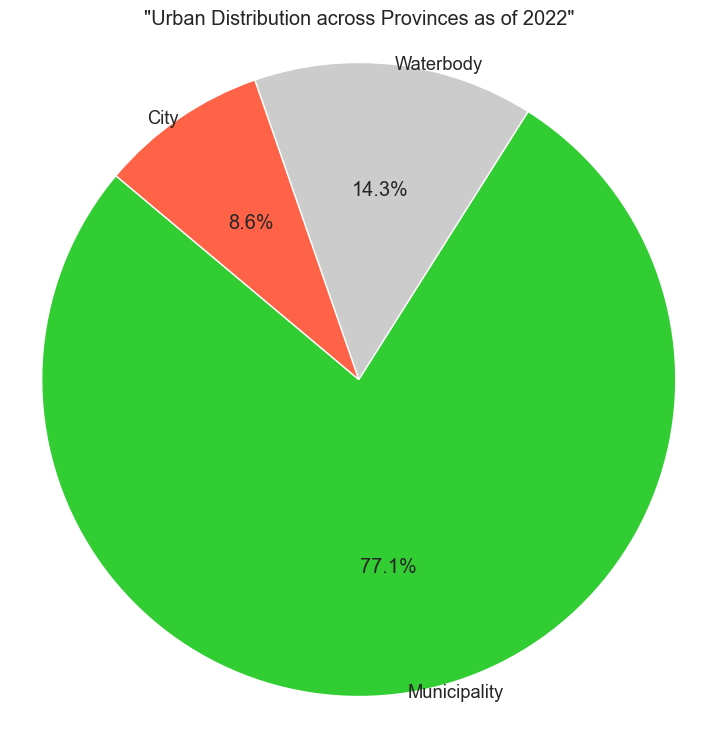

In [278]:
color_mapping = {
    'City': '#FF6347',       
    'Water Body': '#1E90FF',  
    'Municipality': '#32CD32' 
}

plt.figure(figsize=(9, 9))
plt.pie(classif_shares, labels=classif_shares.index, autopct='%1.1f%%', startangle=140, 
        colors=[color_mapping.get(category, '#CCCCCC') for category in classif_shares.index],
        labeldistance=1.000) 

plt.title('"Urban Distribution across Provinces as of 2022"')
plt.axis('equal')

plt.show()


# Visualizing Population

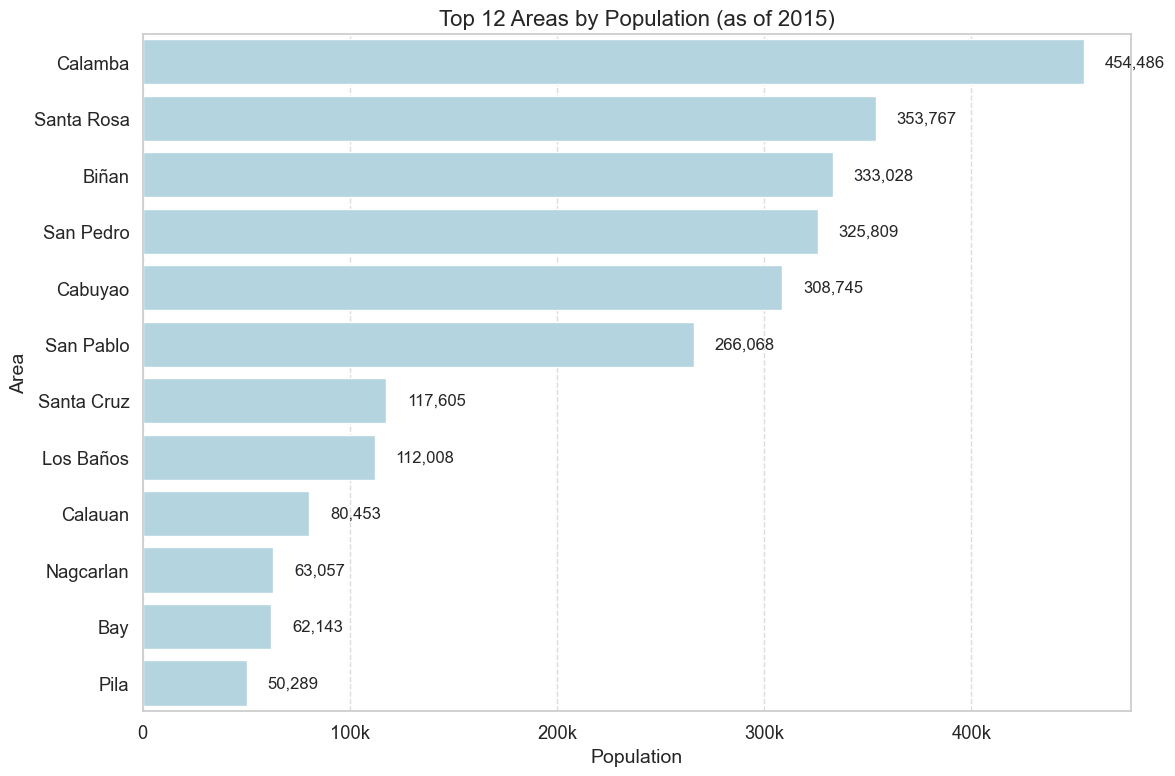

In [274]:
def format_ticks(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.1f}m"
    elif x >= 1e3:
        return f"{x/1e3:.0f}k"
    else:
        return f"{x:.0f}"

top_10_pop = merged_Laguna.sort_values(by='pop', ascending=False).head(12)

# Creating subplots
plt.figure(figsize=(12, 8))


ax = sns.barplot(x='pop', y='shp_municipality', data=top_10_pop, color='lightblue', edgecolor='white')
plt.title('Top 12 Areas by Population (as of 2015)', fontsize=16)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for p in ax.patches:
    plt.text(p.get_width() + 10000, p.get_y() + p.get_height() / 2, f'{p.get_width():,.0f}',
             ha='left', va='center', fontsize=12)

ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.tight_layout()

plt.show()

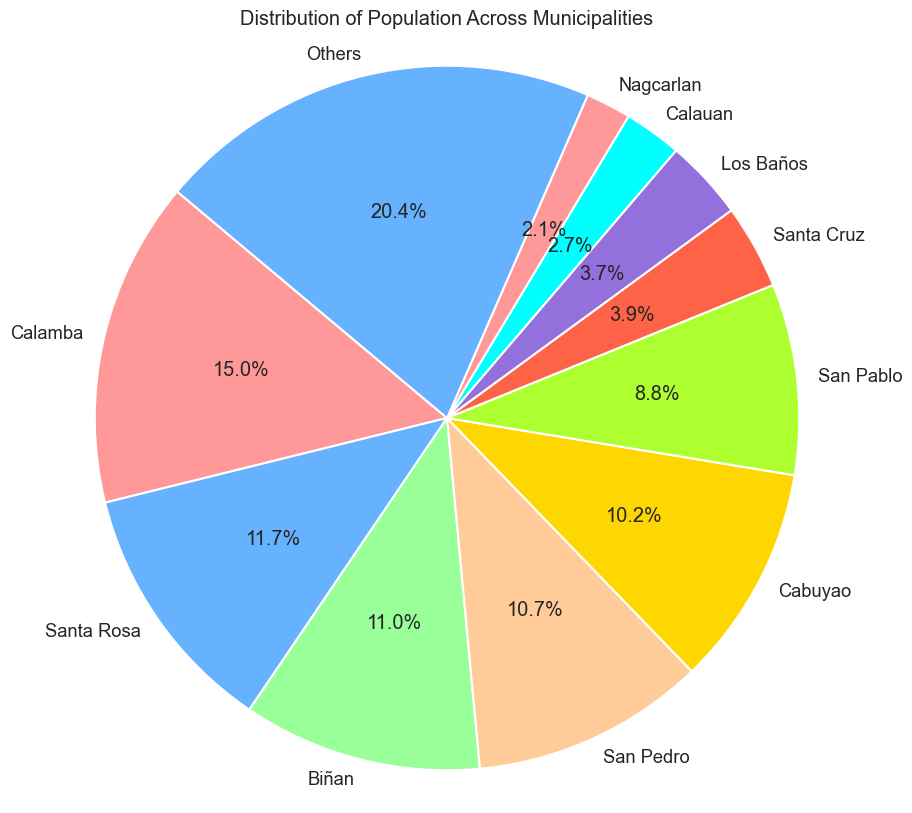

In [273]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#ADFF2F', '#FF6347', '#9370DB', '#00FFFF']
top_10 = merged_Laguna.nlargest(10, 'pop')
total_others = merged_Laguna['pop'].sum() - top_10['pop'].sum()

top_10_others = pd.concat([top_10, pd.DataFrame({'shp_municipality': ['Others'], 'pop': [total_others]})])
plt.figure(figsize=(10, 10))
plt.pie(top_10_others['pop'], labels=top_10_others['shp_municipality'], autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1.5), labeldistance=1.06, colors=colors)
plt.title('Distribution of Population Across Municipalities')
plt.axis('equal')
plt.show()

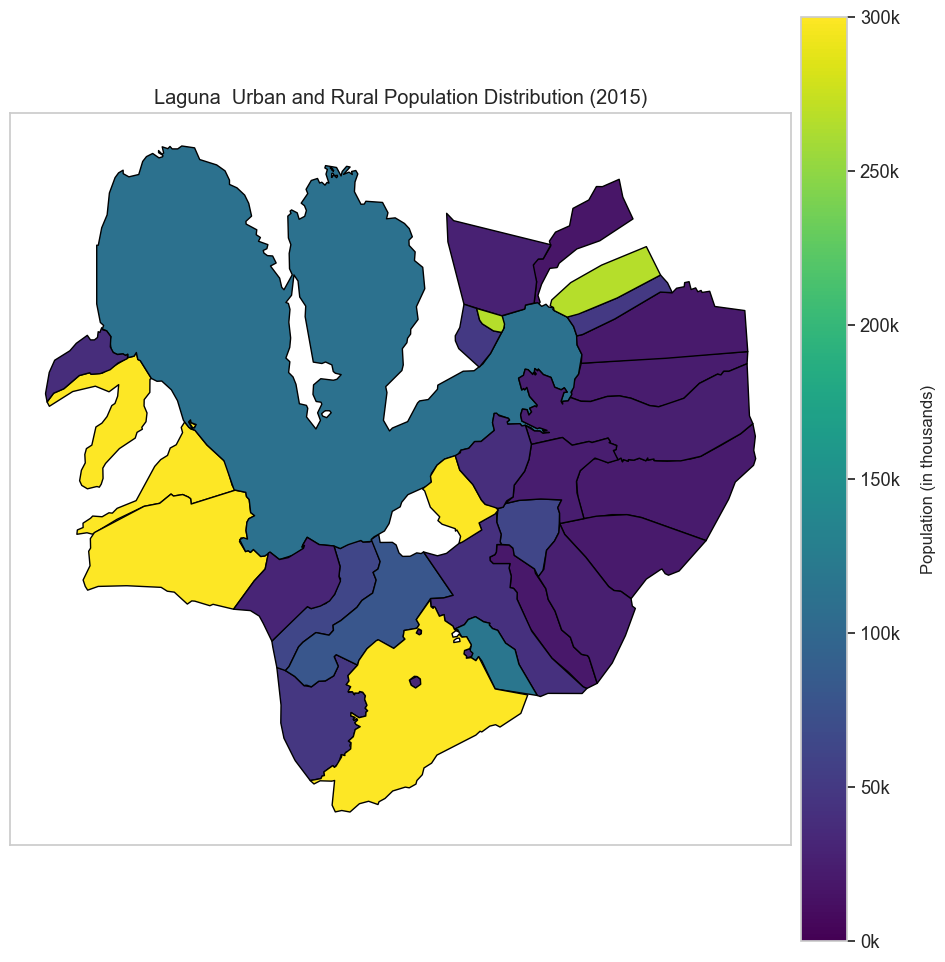

In [272]:
gdf = gpd.GeoDataFrame(merged_Laguna, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
vmin = 0
vmax = 300000


cmap = 'viridis'
column_name = 'pop'

gdf.plot(column=column_name, ax=ax, cmap=cmap, linewidth=1, edgecolor='black', vmin=vmin, vmax=vmax)
ax.set_title("Laguna  Urban and Rural Population Distribution (2015)")

ax.set_xticks([])
ax.set_yticks([])

def format_ticksmap(x, pos):
    x /= 1
    if x >= 1e6:
        return f"{x/1e6:,.0f}m"
    elif x >= 1e5:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e4:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e3:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e2:
        return f"{x/1e3:,.0f}k"
    else:
        return f"{x:,.0f}k" 

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Population (in thousands)', fontsize=12, labelpad=15)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_ticksmap))

plt.show()

## Ilustrating Tax Revenue Trends

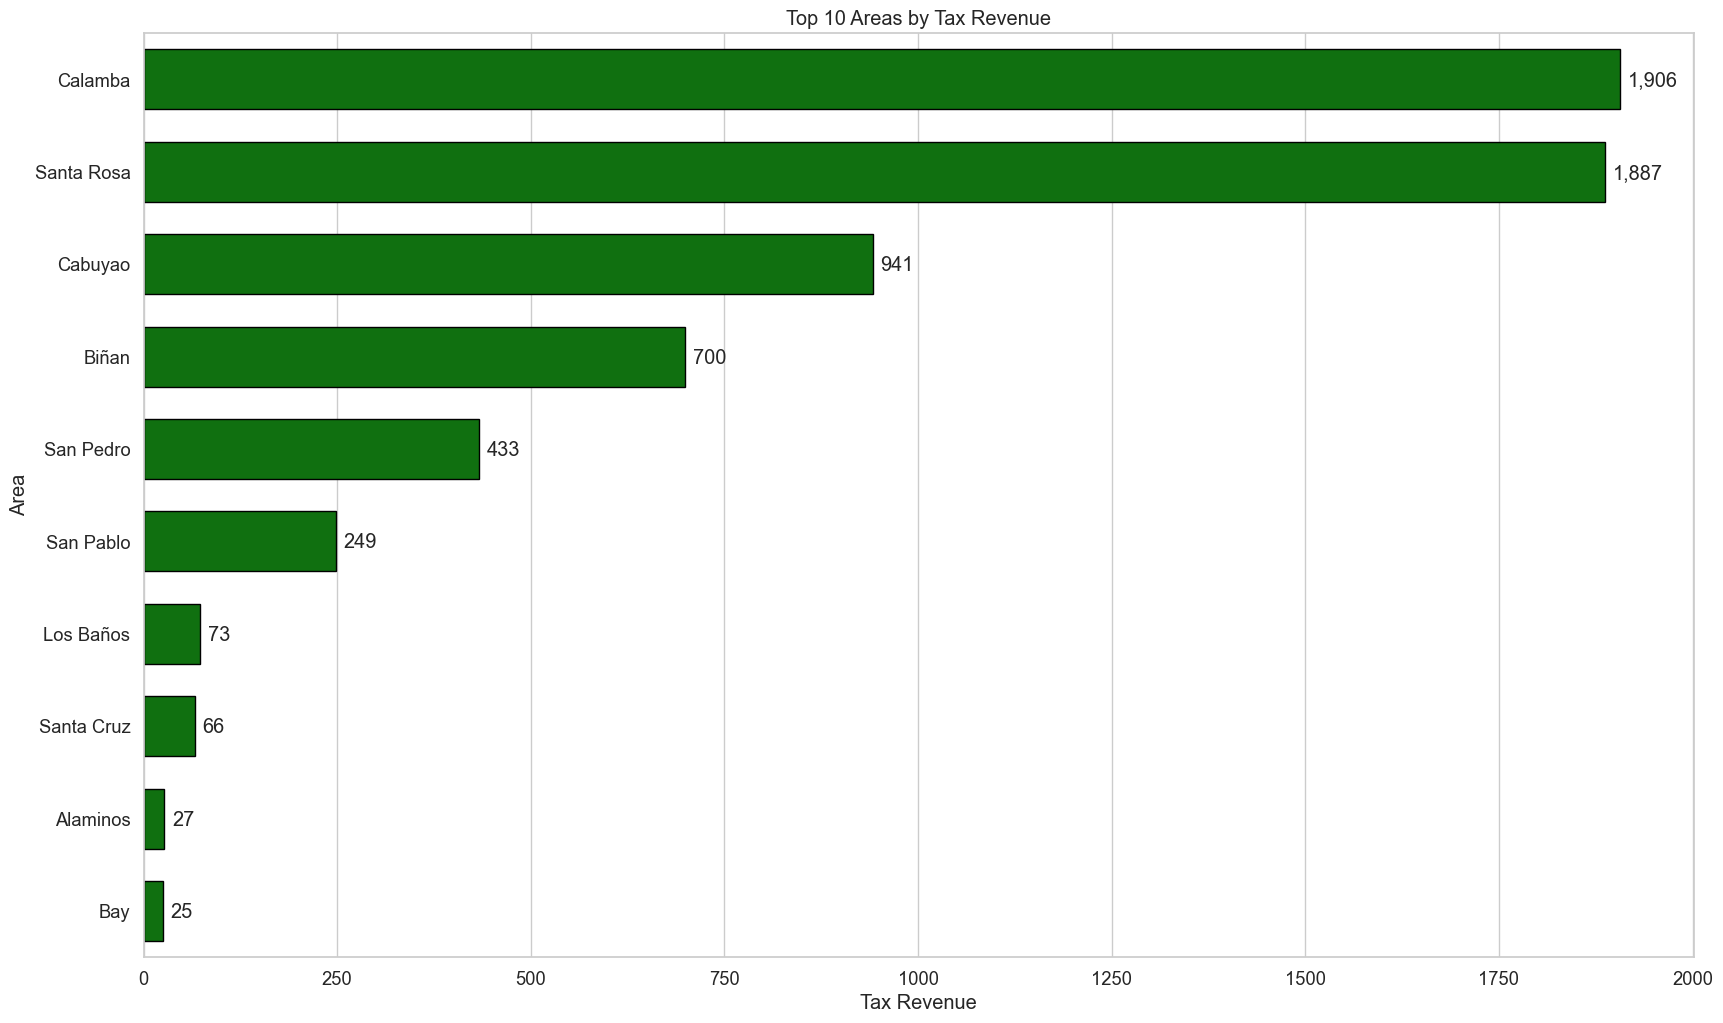

In [212]:
# Filtering the top 10 towns by shares of yes and no votes
top_10_tax = merged_Laguna.sort_values(by='tot_tax_revenue', ascending=False).head(10)

# Creating subplots
plt.figure(figsize=(20, 12))

# Plotting top 15 towns with the highest tax revenue
ax = sns.barplot(x='tot_tax_revenue', y='shp_municipality', data=top_10_tax, color='Green', edgecolor='', width=0.65)
plt.title('Top 10 Areas by Tax Revenue')
plt.xlabel('Tax Revenue')
plt.ylabel('Area')

# Adding annotations for tax revenue
for i, p in enumerate(ax.patches):
    tax_para_sa_bulsa_ni_bbm = top_10_tax.iloc[i]['tot_tax_revenue']
    plt.annotate(f'{tax_para_sa_bulsa_ni_bbm:,.0f}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, -1), textcoords='offset points')

plt.show()

In [213]:
merged_Laguna.columns

Index(['shp_province', 'shp_municipality', 'NAME_2', 'ENGTYPE_2', 'pop',
       'tot_local_sources', 'tot_tax_revenue', 'tot_current_oper_income',
       'total_oper_expenses', 'net_oper_income', 'total_non_income_receipts',
       'capital_expenditure', 'total_non_oper_expenditures',
       'cash_balance_end', 'geometry'],
      dtype='object')

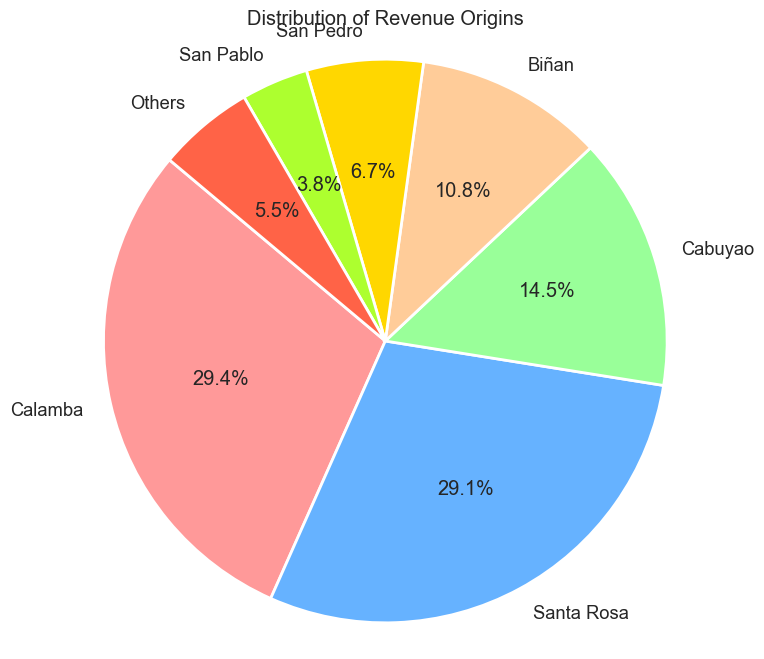

In [268]:
top_10 = merged_Laguna.nlargest(6, 'tot_tax_revenue')

# Calculate the total revenue of the remaining municipalities/cities
total_others = merged_Laguna['tot_tax_revenue'].sum() - top_10['tot_tax_revenue'].sum()

# Create a new DataFrame for the top 10 and 'Others'
top_10_others = pd.concat([top_10, pd.DataFrame({'shp_municipality': ['Others'], 'tot_tax_revenue': [total_others]})])

# Define a new color palette
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#ADFF2F', '#FF6347', '#9370DB', '#00FFFF']

# Plot the pie chart with the specified colors
plt.figure(figsize=(8, 8))
plt.pie(top_10_others['tot_tax_revenue'], labels=top_10_others['shp_municipality'], autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=2), labeldistance=1.1, colors=colors)
plt.title('Distribution of Revenue Origins')
plt.axis('equal')

plt.show()

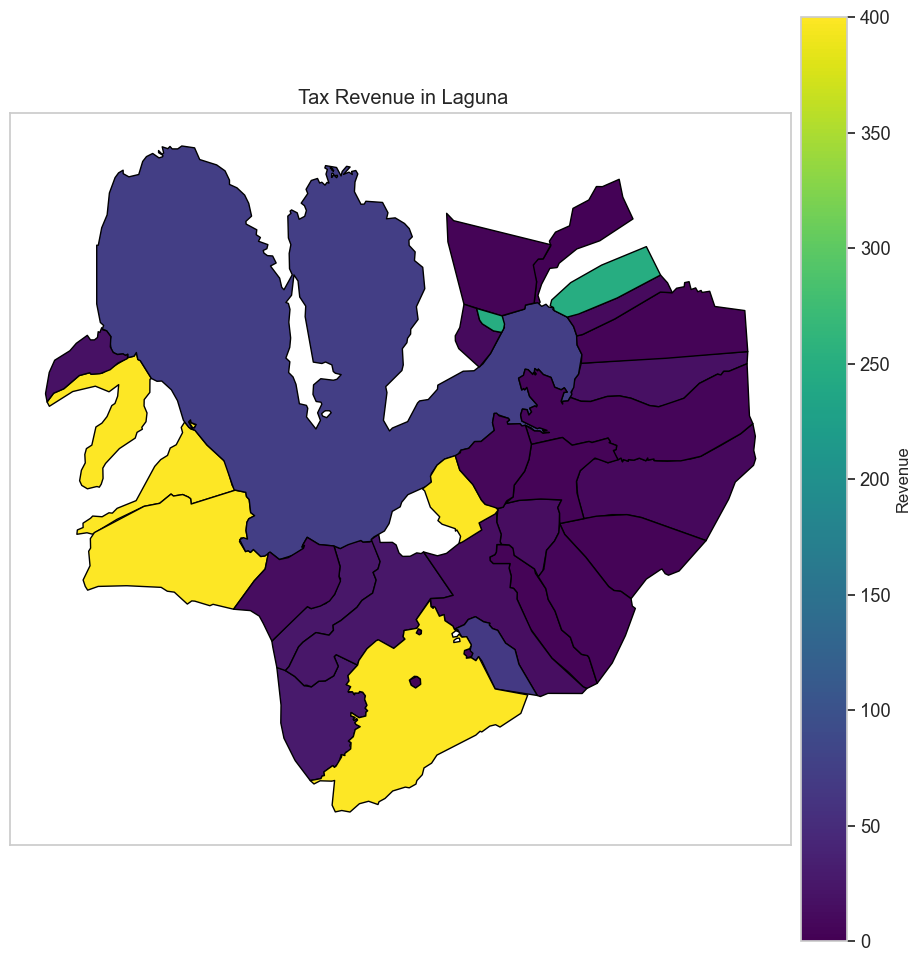

In [262]:
gdf = gpd.GeoDataFrame(merged_Laguna, geometry='geometry')

# Plot the GeoDataFrame for tax revenue
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Define the minimum and maximum values for colormap
vmin = 0
vmax = 400

# Choose a different colormap
cmap = 'viridis'  # You can choose any other colormap from Matplotlib

# Define the column name for tax revenue
column_name = 'tot_tax_revenue'

# Plot tax revenue
gdf.plot(column=column_name, ax=ax, cmap=cmap, linewidth=1, edgecolor='black', vmin=vmin, vmax=vmax)
ax.set_title(" Tax Revenue in Laguna")

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Update the colorbar tick labels
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Revenue', fontsize=12)
cbar.ax.xaxis.set_major_formatter(FuncFormatter(format_ticksmap))

# Show the plot
plt.show()

# Visualizing Total Current Operating Income

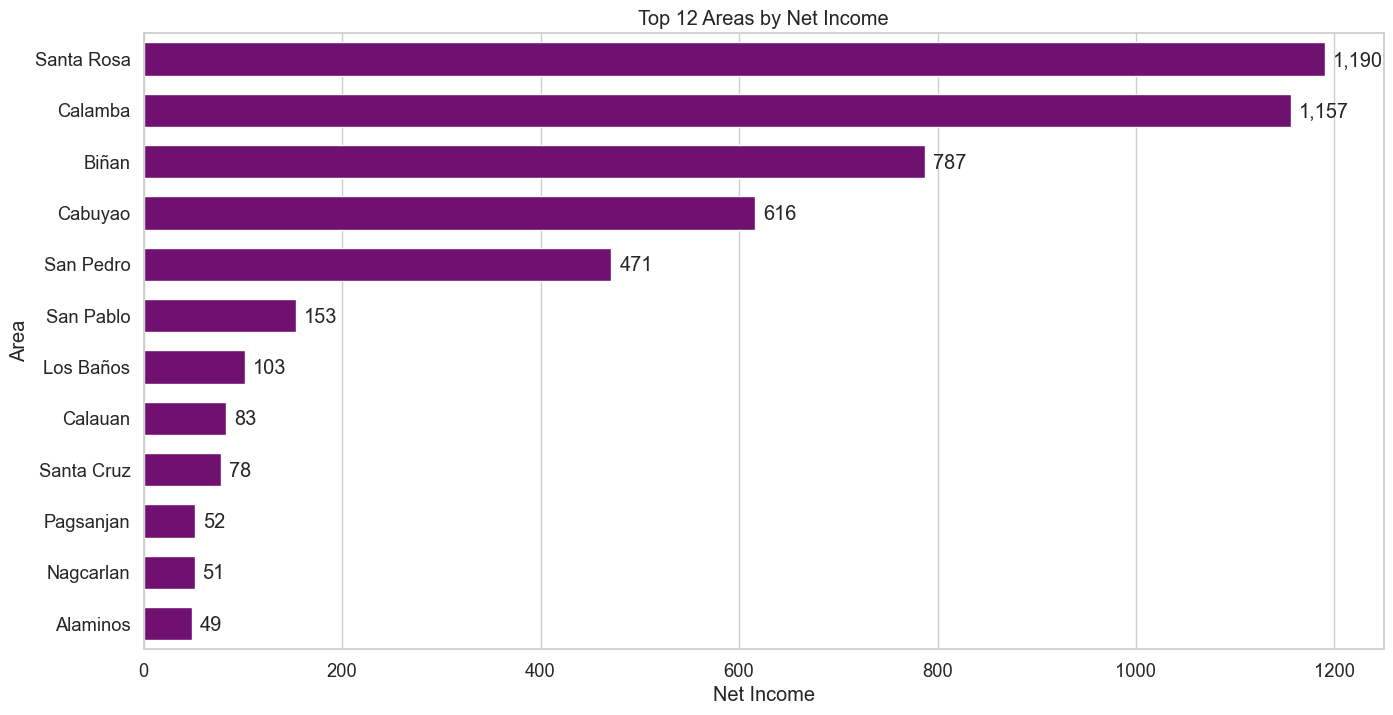

In [232]:
top_12_tax = merged_Laguna.sort_values(by='net_oper_income', ascending=False).head(12)

# Creating subplots
plt.figure(figsize=(16, 8))


ax = sns.barplot(x='net_oper_income', y='shp_municipality', data=top_12_tax, color='purple', edgecolor='white', width=0.65)
plt.title('Top 12 Areas by Net Income')
plt.xlabel('Net Income')
plt.ylabel('Area')

for i, p in enumerate(ax.patches):
    tax_para_sa_bulsa_ni_bbm = top_10_tax.iloc[i]['net_oper_income']
    plt.annotate(f'{tax_para_sa_bulsa_ni_bbm:,.0f}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, -1), textcoords='offset points')


plt.show()

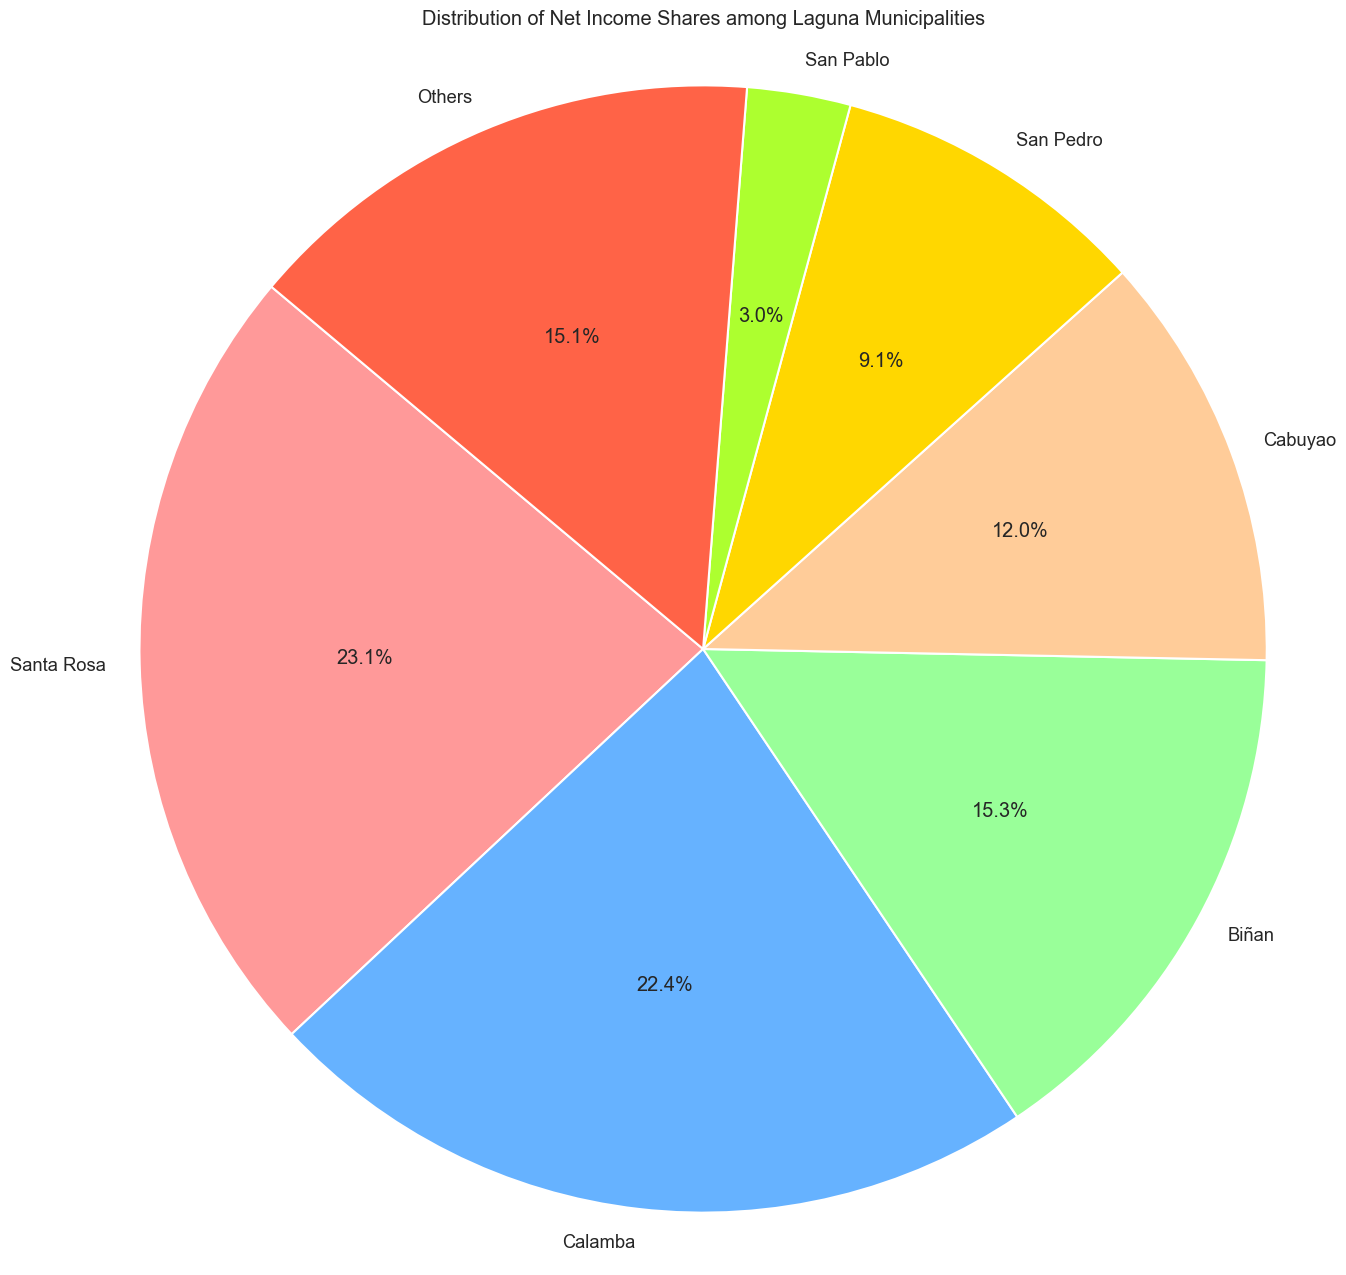

In [261]:
# Define colors for each segment
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#ADFF2F', '#FF6347', '#9370DB', '#00FFFF']

# Get the top 6 municipalities/cities
top_6 = merged_Laguna.nlargest(6, 'net_oper_income')

# Calculate the total net operating income of the remaining municipalities/cities
total_others = merged_Laguna['net_oper_income'].sum() - top_6['net_oper_income'].sum()

# Create a new DataFrame for the top 6 and 'Others'
top_6_others = pd.concat([top_6, pd.DataFrame({'shp_municipality': ['Others'], 'net_oper_income': [total_others]})])

# Plot the pie chart with the new color scheme
plt.figure(figsize=(16, 16))
plt.pie(top_6_others['net_oper_income'], labels=top_6_others['shp_municipality'], autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1.5), labeldistance=1.06, colors=colors)
plt.title('Distribution of Net Income Shares among Laguna Municipalities')

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

plt.show()


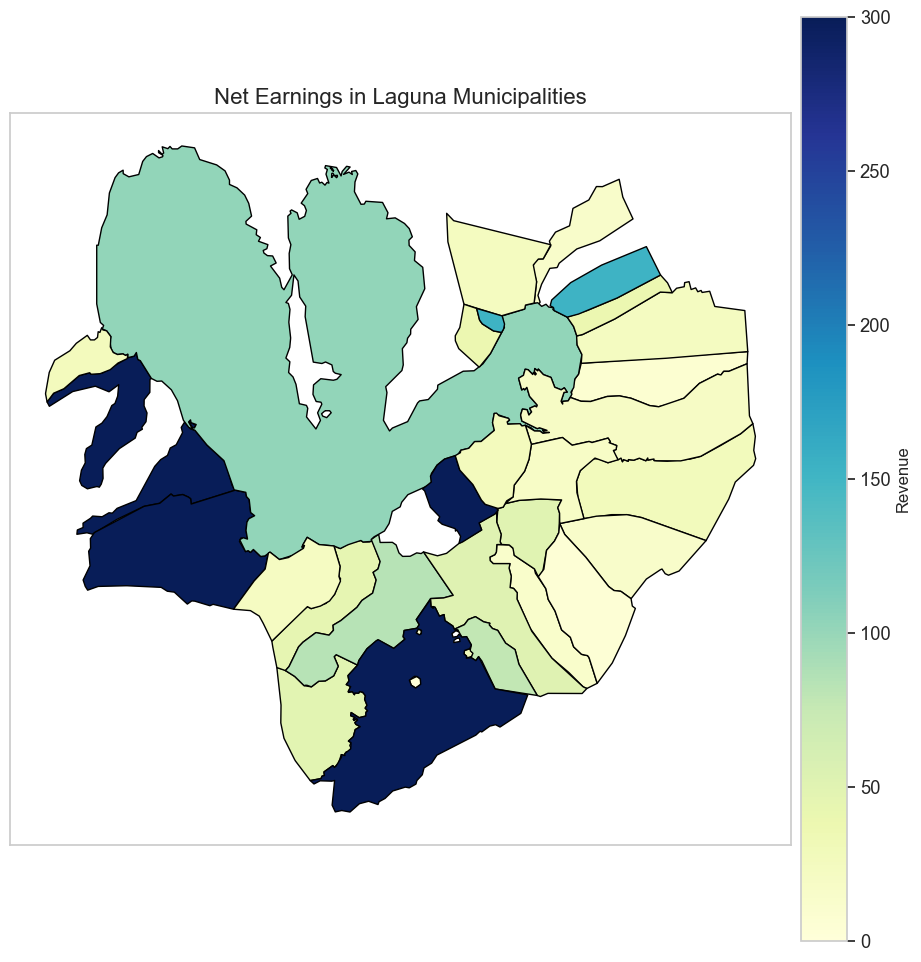

In [260]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the function for formatting ticks
def format_ticksmap(x, pos):
    x /= 1
    if x >= 1e6:
        return f"{x/1e6:,.0f}m"
    elif x >= 1e5:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e4:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e3:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e2:
        return f"{x/1e3:,.0f}k"
    else:
        return f"{x:,.0f}k"  # Format the value with 'k' suffix

# Convert merged_Laguna to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_Laguna, geometry='geometry')

# Plot the GeoDataFrame for the overall growth rate
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Define the minimum and maximum values for colormap
vmin = 0
vmax = 300

# Choose a different colormap
cmap = 'YlGnBu'

# Define the column name for net operating income
column_name = 'net_oper_income'

# Plot net operating income
gdf.plot(column=column_name, ax=ax, cmap=cmap, linewidth=1, edgecolor='black', vmin=vmin, vmax=vmax)
ax.set_title("Net Earnings in Laguna Municipalities", fontsize=16)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Update the colorbar tick labels
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Revenue', fontsize=12)
cbar.ax.xaxis.set_major_formatter(FuncFormatter(format_ticksmap))

# Show the plot
plt.show()


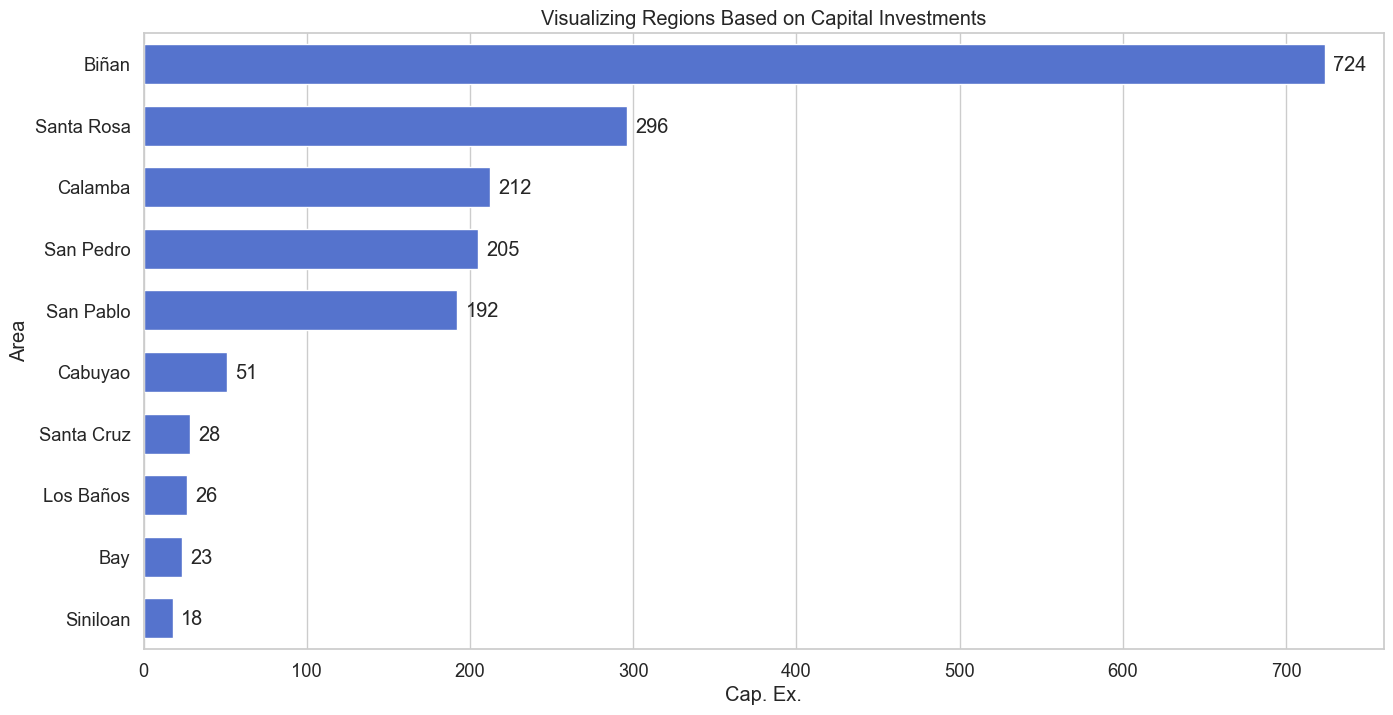

In [259]:
# Filtering the top 10 towns by shares of yes and no votes
top_10_tax = merged_Laguna.sort_values(by='capital_expenditure', ascending=False).head(10)

# Creating subplots
plt.figure(figsize=(16, 8))

# Plotting top 15 towns with the highest tax revenue
ax = sns.barplot(x='capital_expenditure', y='shp_municipality', data=top_10_tax, color='royalblue', edgecolor='white', width=0.65)
plt.title('Visualizing Regions Based on Capital Investments')
plt.xlabel('Cap. Ex.')
plt.ylabel('Area')

# Adding annotations for tax revenue
for i, p in enumerate(ax.patches):
    tax_para_sa_bulsa_ni_bbm = top_10_tax.iloc[i]['capital_expenditure']
    plt.annotate(f'{tax_para_sa_bulsa_ni_bbm:,.0f}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, -1), textcoords='offset points')


plt.show()

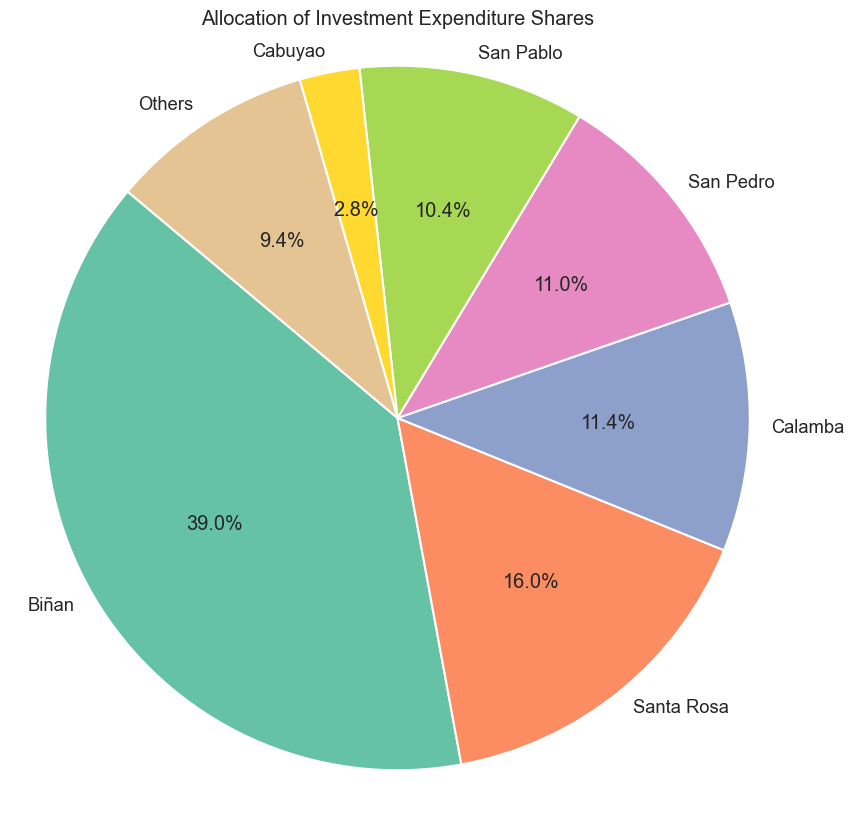

In [266]:
# Get the top 10 municipalities/cities
top_10 = merged_Laguna.nlargest(6, 'capital_expenditure')

# Calculate the total population of the remaining municipalities/cities
total_others = merged_Laguna['capital_expenditure'].sum() - top_10['capital_expenditure'].sum()

# Create a new DataFrame for the top 10 and 'Others'
top_10_others = pd.concat([top_10, pd.DataFrame({'shp_municipality': ['Others'], 'capital_expenditure': [total_others]})])

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_others['capital_expenditure'], labels=top_10_others['shp_municipality'], autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1.5), labeldistance=1.06)
plt.title('Allocation of Investment Expenditure Shares')
plt.axis('equal')


plt.show()

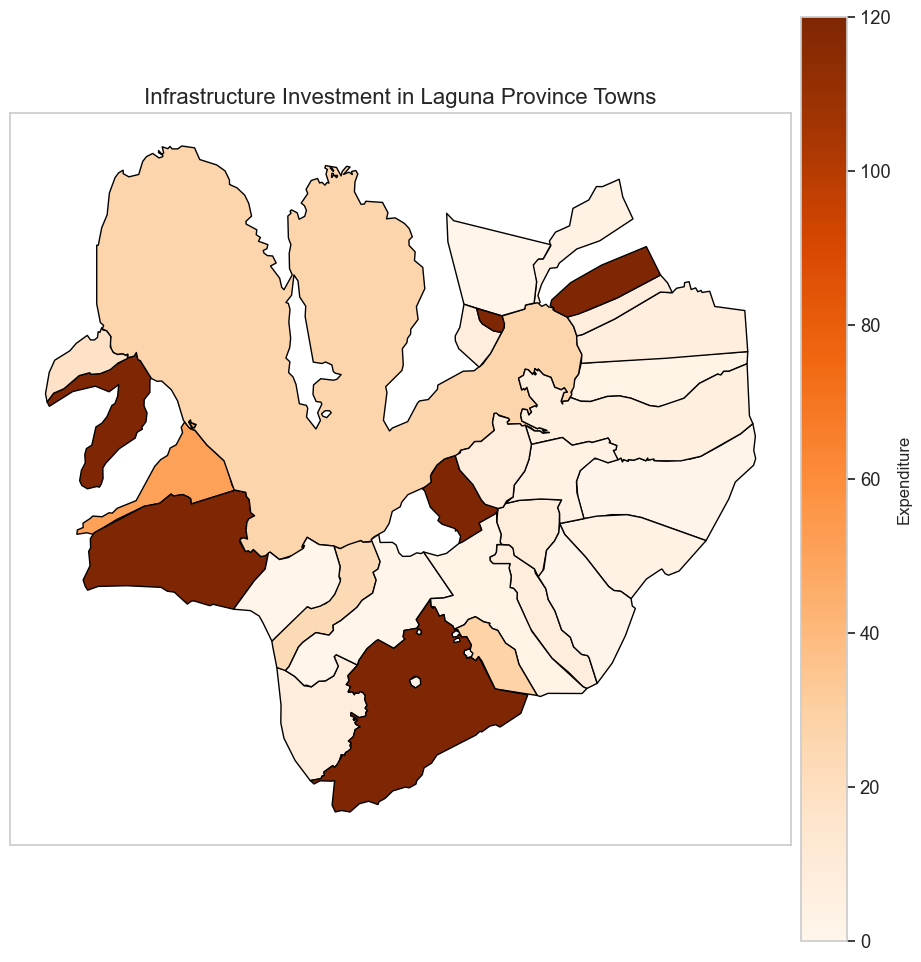

In [253]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the function for formatting ticks
def format_ticksmap(x, pos):
    x /= 1
    if x >= 1e6:
        return f"{x/1e6:,.0f}m"
    elif x >= 1e5:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e4:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e3:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e2:
        return f"{x/1e3:,.0f}k"
    else:
        return f"{x:,.0f}k"  # Format the value with 'k' suffix

# Convert merged_Laguna to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_Laguna, geometry='geometry')

# Plot the GeoDataFrame for capital expenditure
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Define the minimum and maximum values for colormap
vmin = 0
vmax = 120

# Choose a different colormap
cmap = 'Oranges'

# Define the column name for capital expenditure
column_name = 'capital_expenditure'

# Plot capital expenditure
gdf.plot(column=column_name, ax=ax, cmap=cmap, linewidth=1, edgecolor='black', vmin=vmin, vmax=vmax)
ax.set_title( "Infrastructure Investment in Laguna Province Towns", fontsize=16)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Update the colorbar tick labels
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Expenditure', fontsize=12)
cbar.ax.xaxis.set_major_formatter(FuncFormatter(format_ticksmap))

# Show the plot
plt.show()


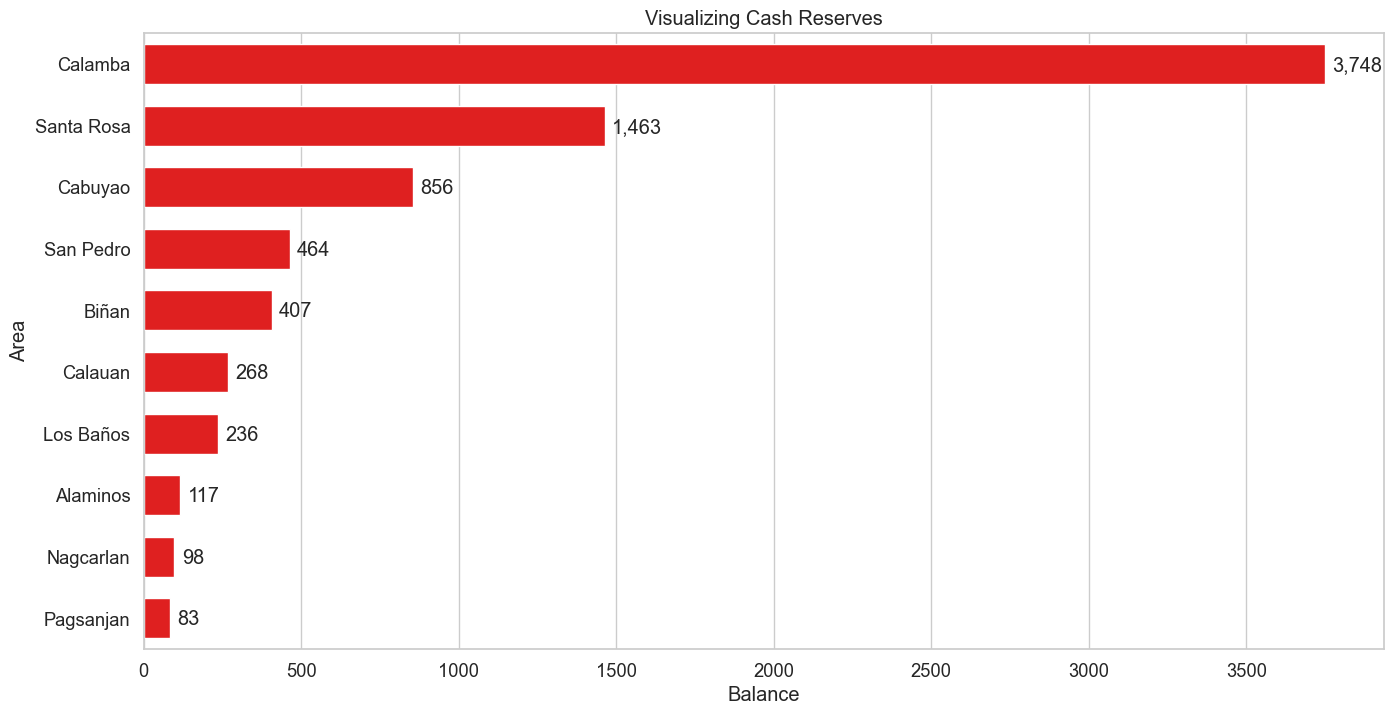

In [252]:
# Filtering the top 10 towns by shares of yes and no votes
top_10_tax = merged_Laguna.sort_values(by='cash_balance_end', ascending=False).head(10)

# Creating subplots
plt.figure(figsize=(16, 8))

# Plotting top 15 towns with the highest tax revenue
ax = sns.barplot(x='cash_balance_end', y='shp_municipality', data=top_10_tax, color='red', edgecolor='white', width=0.65)
plt.title('Visualizing Cash Reserves')
plt.xlabel('Balance')
plt.ylabel('Area')

# Adding annotations for tax revenue
for i, p in enumerate(ax.patches):
    tax_para_sa_bulsa_ni_bbm = top_10_tax.iloc[i]['cash_balance_end']
    plt.annotate(f'{tax_para_sa_bulsa_ni_bbm:,.0f}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, -1), textcoords='offset points')


plt.show()

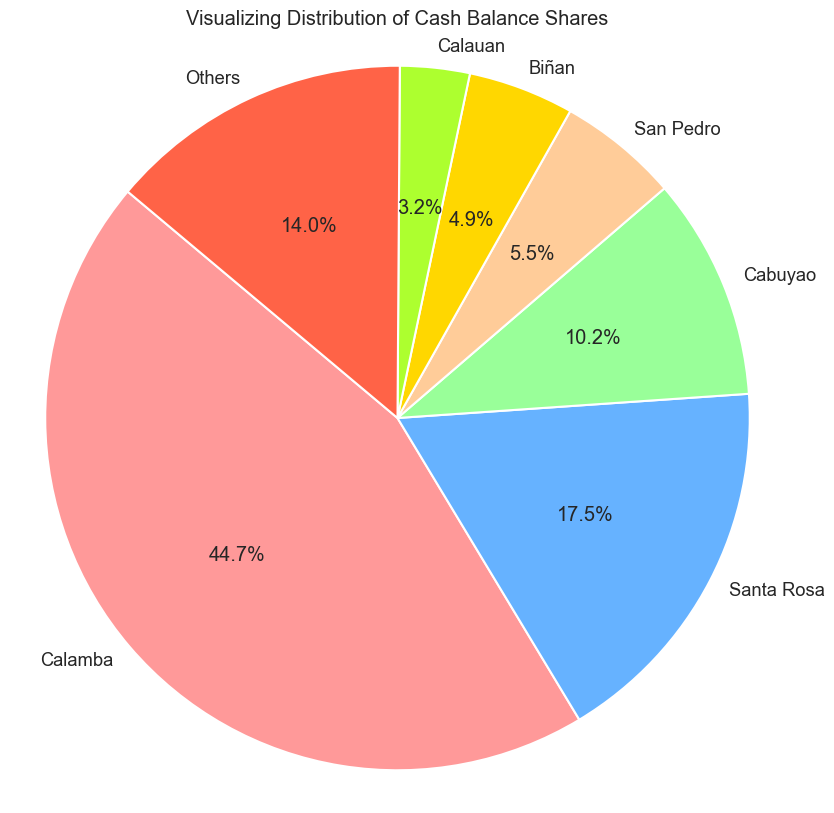

In [257]:
# Get the top 10 municipalities/cities
top_10 = merged_Laguna.nlargest(6, 'cash_balance_end')

# Calculate the total cash balance of the remaining municipalities/cities
total_others = merged_Laguna['cash_balance_end'].sum() - top_10['cash_balance_end'].sum()

# Create a new DataFrame for the top 10 and 'Others'
top_10_others = pd.concat([top_10, pd.DataFrame({'shp_municipality': ['Others'], 'cash_balance_end': [total_others]})])

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#ADFF2F', '#FF6347', '#9370DB', '#00FFFF']

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_others['cash_balance_end'], labels=top_10_others['shp_municipality'], autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1.5), labeldistance=1.06, colors=colors)
plt.title('Visualizing Distribution of Cash Balance Shares')
plt.axis('equal')

plt.show()


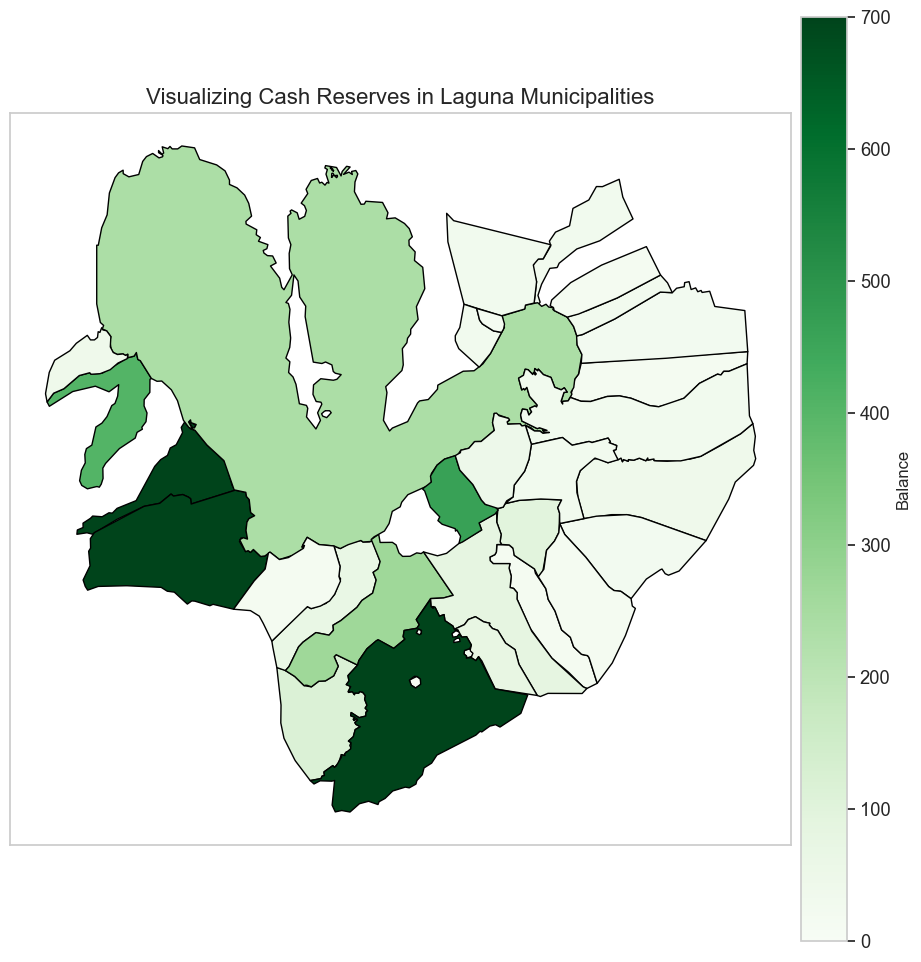

In [256]:
def format_ticksmap(x, pos):
    x /= 1
    if x >= 1e6:
        return f"{x/1e6:,.0f}m"
    elif x >= 1e5:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e4:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e3:
        return f"{x/1e3:,.0f}k"
    elif x >= 1e2:
        return f"{x/1e3:,.0f}k"
    else:
        return f"{x:,.0f}k"  # Format the value with 'k' suffix

# Convert merged_Laguna to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_Laguna, geometry='geometry')

# Plot the GeoDataFrame for cash balance
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Define the minimum and maximum values for colormap
vmin = 0
vmax = 700

# Choose a different colormap
cmap = 'Greens'

# Define the column name for cash balance
column_name = 'cash_balance_end'

# Plot cash balance
gdf.plot(column=column_name, ax=ax, cmap=cmap, linewidth=1, edgecolor='black', vmin=vmin, vmax=vmax)
ax.set_title("Visualizing Cash Reserves in Laguna Municipalities", fontsize=16)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Update the colorbar tick labels
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Balance', fontsize=12)
cbar.ax.xaxis.set_major_formatter(FuncFormatter(format_ticksmap))

# Show the plot
plt.show()